# Bank Marketing Prediction

# Importing the data set

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("bank-marketing.csv")

In [5]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.shape

(45211, 19)

In [7]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [8]:
print(df['pdays'].mean())
print(df['pdays'].median())
print(df['pdays'].min())

40.19782796222158
-1.0
-1


Mean value is so less and 
Median is -1 it means there are negative values of pdays in the dataset which is not possible as pdays should be positive
and min can't be -1 as number of days passed can't be negative


In [9]:
print(df[df['pdays'] != -1]['pdays'].mean())
print(df[df['pdays'] != -1]['pdays'].median())

224.57769165556496
194.0


This time mean and median are much better than the previous one

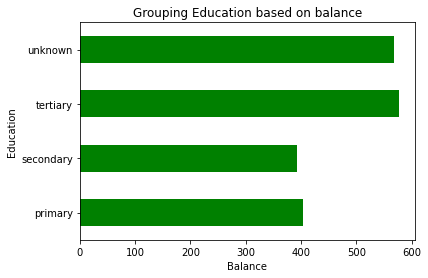

In [10]:
from matplotlib import *
df.groupby('education')['balance'].median().plot.barh(color='green')
plt.ylabel('Education')
plt.xlabel('Balance')
plt.title('Grouping Education based on balance');

Tertiary Education has the highest median 

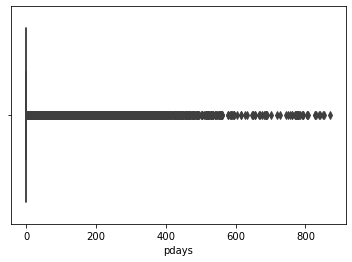

In [11]:
sns.boxplot(df['pdays'])

Yes there are a lot of outliers

# Convert the response variable to a convenient form

In [12]:
df.isna().sum()


age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

There are no missing values

In [13]:
df.response.replace({'no':0,'yes':1} ,inplace = True)


In [14]:
df.response.sample(10)

39999    0
25247    0
590      0
6629     0
222      0
8549     0
27327    0
32691    0
12722    0
37782    0
Name: response, dtype: int64

# Plots for associations with numerical features and categorical features’


In [15]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [16]:
categorical_columns = [column for column in df.columns[:-1] if df[column].dtype == "O"]
print(categorical_columns)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


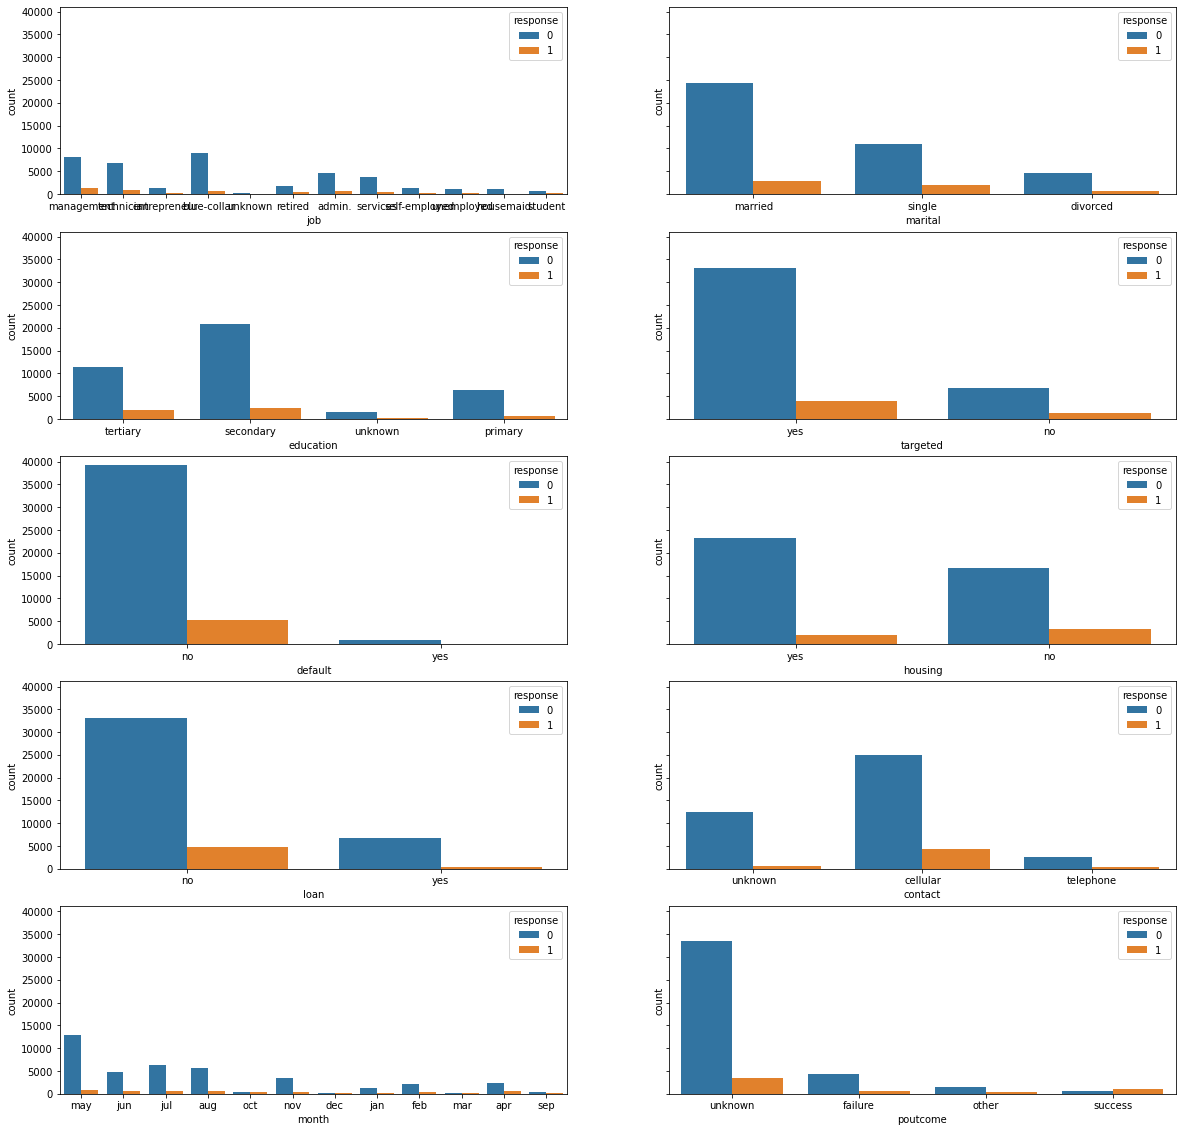

In [17]:
fig, axes = plt.subplots(5,2, figsize=(20,20), sharey=True)

sns.countplot(df['job'],hue=df['response'],ax=axes[0,0]);
sns.countplot(df['marital'],hue=df['response'],ax=axes[0,1]);
sns.countplot(df['education'],hue=df['response'],ax=axes[1,0]);
sns.countplot(df['targeted'],hue=df['response'],ax=axes[1,1]);
sns.countplot(df['default'],hue=df['response'],ax=axes[2,0]);
sns.countplot(df['housing'],hue=df['response'],ax=axes[2,1]);
sns.countplot(df['loan'],hue=df['response'],ax=axes[3,0]);
sns.countplot(df['contact'],hue=df['response'],ax=axes[3,1]);
sns.countplot(df['month'],hue=df['response'],ax=axes[4,0]);
sns.countplot(df['poutcome'],hue=df['response'],ax=axes[4,1]);


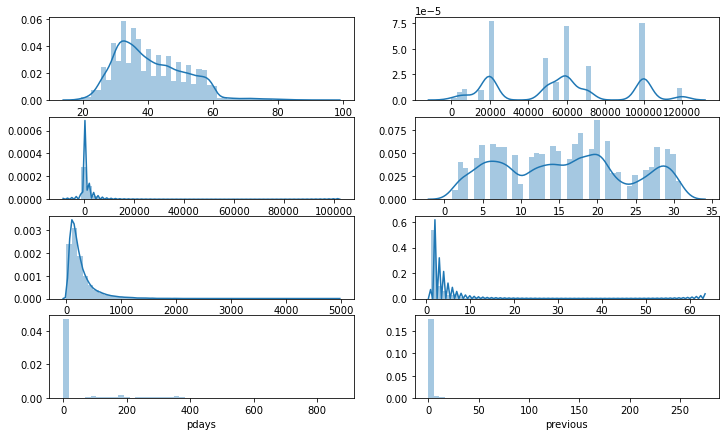

In [18]:
fig, axes = plt.subplots(4,2, figsize=(12, 7))

sns.distplot(df["age"], ax=axes[0,0])
sns.distplot(df["salary"], ax=axes[0,1])
sns.distplot(df["balance"], ax=axes[1,0])
sns.distplot(df["day"], ax=axes[1,1])
sns.distplot(df["duration"], ax=axes[2,0])
sns.distplot(df["campaign"], ax=axes[2,1])
sns.distplot(df["pdays"], ax=axes[3,0])
sns.distplot(df["previous"], ax=axes[3,1])


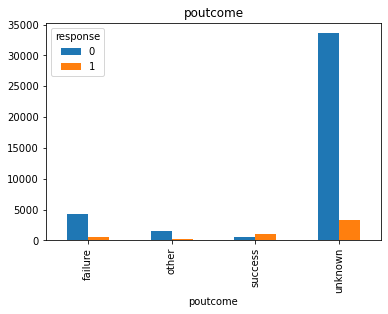

In [19]:
pd.crosstab(df['poutcome'],df['response']).plot.bar()
plt.title('poutcome');

No,because there are so many unknown values in poutcome

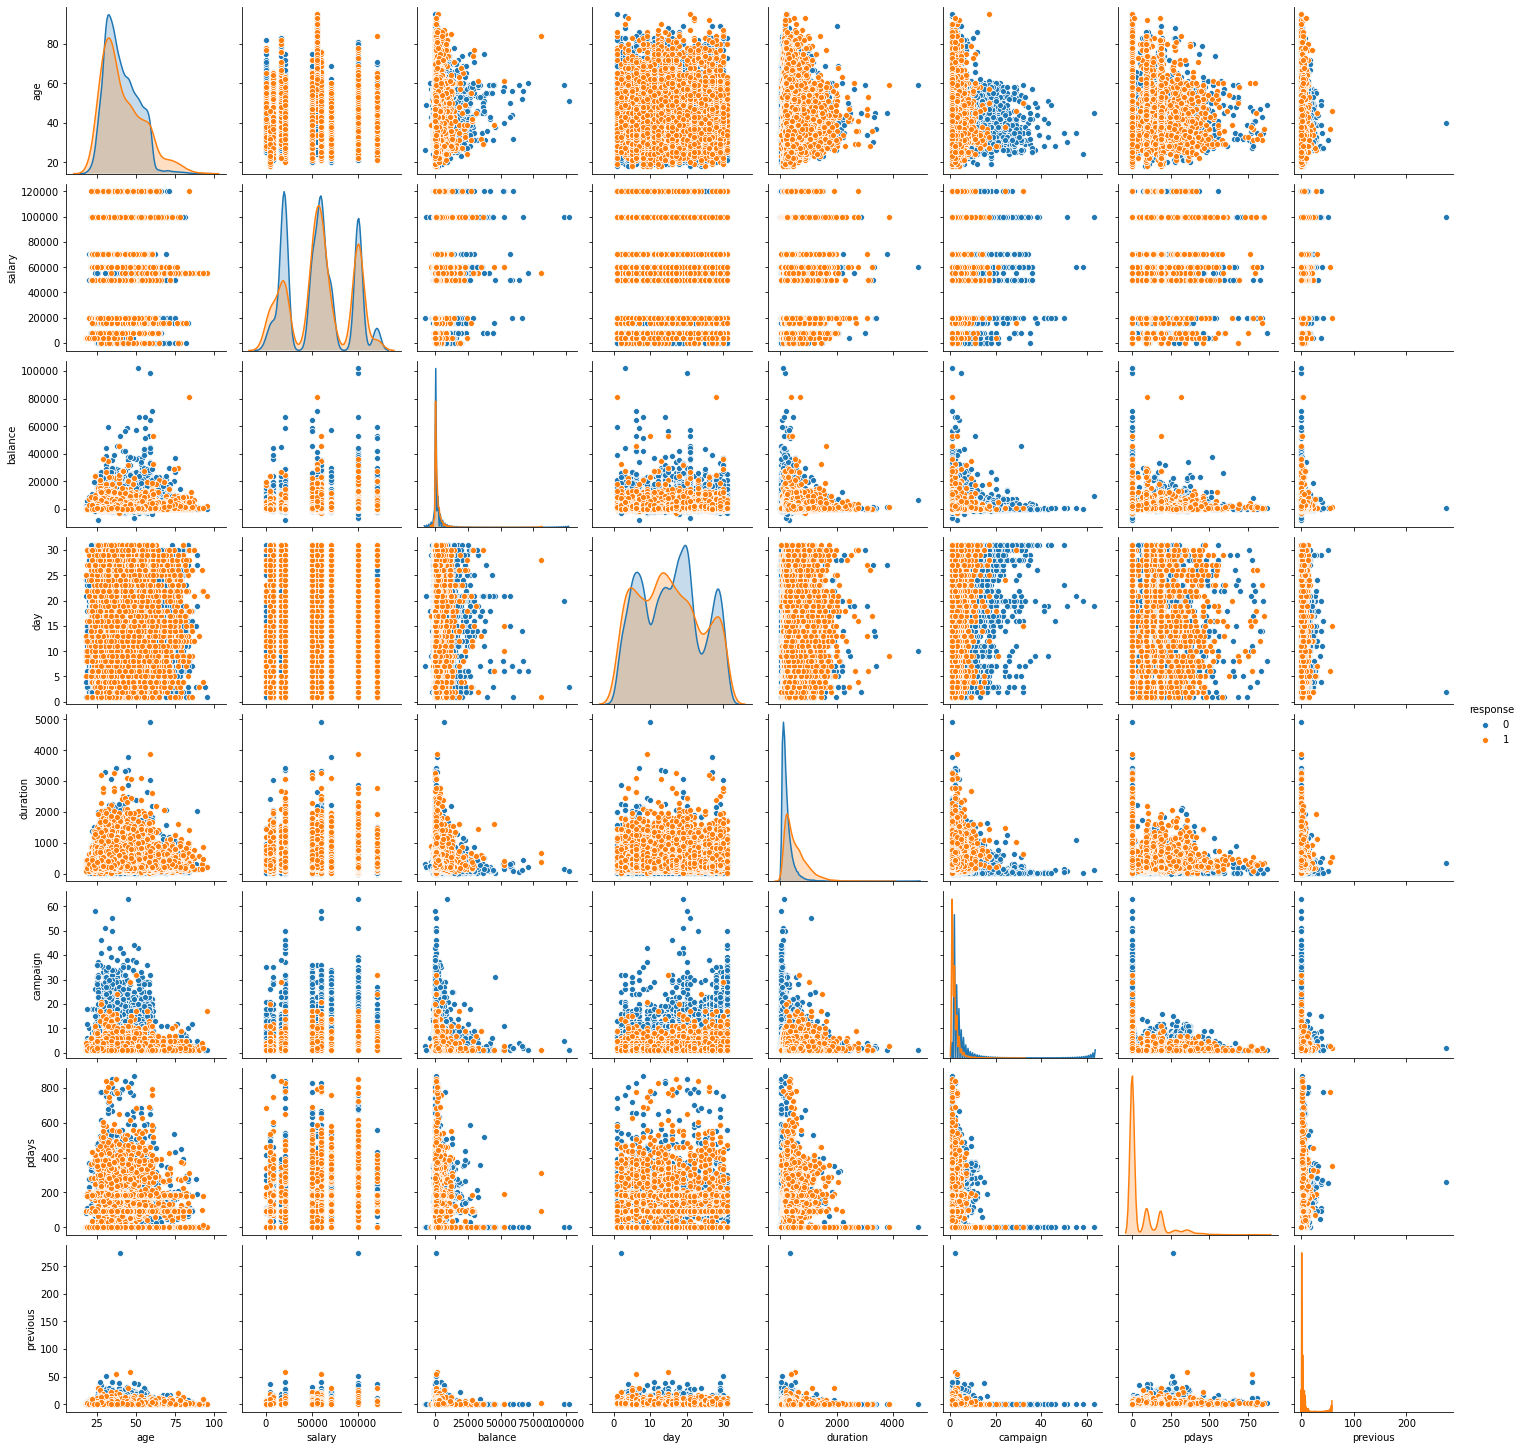

In [20]:
sns.pairplot(df,hue='response');


Yes pdays and poutcome are associated with target.

In [21]:
df['pdays_no_contact'] = np.where(df['pdays']==-1,1,0)
df['pdays_no_contact'].value_counts()

1    36954
0     8257
Name: pdays_no_contact, dtype: int64

Missing Values are represented as Unknown which is better way to handle missing data by becoming a new category itself rather than imputing it with the mode of the particular column.

# Handling outliers in the data

In [22]:
num_columns = [col for col in df.columns if col not in categorical_columns]
print(num_columns)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response', 'pdays_no_contact']


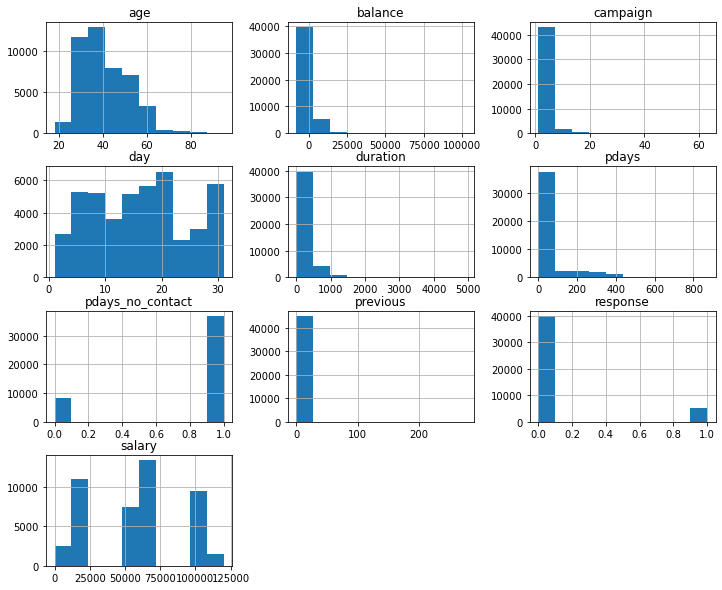

In [23]:
dist=df.hist(figsize=(12,10))


In [24]:
upper_boundary = df['age'].mean() + 3* df['age'].std()
lower_boundary = df['age'].mean() - 3* df['age'].std()
print(lower_boundary)
print(upper_boundary)
print(df['age'].mean())

9.079924091402077
72.79249633725466
40.93621021432837


In [25]:
index = df[(df['age']>upper_boundary) | (df['age']<lower_boundary)].index
df.drop(index=index,axis=0,inplace=True)

In [26]:
df[(df['age']>upper_boundary) | (df['age']<lower_boundary)]


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,pdays_no_contact


In [27]:
IQR=df.balance.quantile(0.75)-df.balance.quantile(0.25)

lower_bridge = df['balance'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['balance'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-1940.5
3423.5


In [28]:
index = df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)].index
df.drop(index=index,axis=0,inplace=True)


In [29]:
df[(df['balance']>upper_bridge) | (df['balance']<lower_bridge)]


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,pdays_no_contact


In [30]:
df.reset_index(inplace=True)


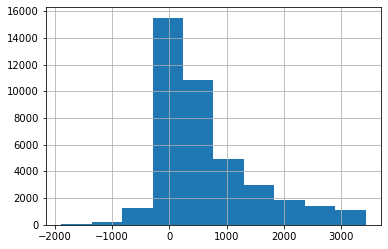

In [31]:
df['balance'].hist()


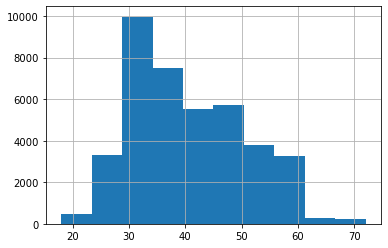

In [32]:
df['age'].hist()


# Handling Categorical columns


In [33]:
df.drop('index',axis=1,inplace=True)
df.drop('poutcome',axis=1,inplace=True)

df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,0,1


In [34]:
df['month'].unique()


array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [35]:
dictionary={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month']=df['month'].map(dictionary)



In [36]:
df['month'].unique()


array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [37]:
df1 = df.copy()
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response,pdays_no_contact
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,5,261,1,-1,0,0,1
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,5,151,1,-1,0,0,1
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,5,76,1,-1,0,0,1
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,5,92,1,-1,0,0,1
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,5,198,1,-1,0,0,1


In [38]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.head()


,age,salary,balance,day,month,duration,campaign,pdays,previous,response,...,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,-1,0,0,...,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,-1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,33,120000,2,5,5,76,1,-1,0,0,...,0,1,0,0,1,0,1,1,0,1
3,47,20000,1506,5,5,92,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,33,0,1,5,5,198,1,-1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [39]:
df1.shape

(40121, 33)

In [40]:
df1.loc[df1['pdays']==-1,'pdays']=0
df1['pdays'].head()

0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64

# Handling Imbalanced dataset

Percentage of subsription :  10.926945988385135
Percentage of no subscription :  89.07305401161486


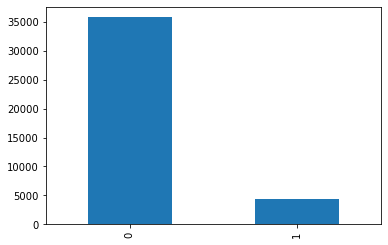

In [41]:
No_sub = len(df[df['response'] == 0])
Sub = len(df[df['response'] == 1])
percent_No_sub = (No_sub/len(df['response'])) * 100
percent_sub = (Sub/len(df['response'])) * 100

print('Percentage of subsription : ',percent_sub)
print('Percentage of no subscription : ', percent_No_sub)


df['response'].value_counts().plot.bar();

In [42]:
from imblearn.combine import SMOTETomek


In [43]:
X = df1.drop('response',axis=1)
y = df1['response']


In [44]:
from collections import Counter

os=SMOTETomek(1)
X_ns,y_ns = os.fit_sample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))


The number of classes before fit Counter({0: 35737, 1: 4384})
The number of classes after fit Counter({0: 34676, 1: 34676})


In [45]:
y_ns.value_counts()


1    34676
0    34676
Name: response, dtype: int64

In [46]:
y_ns.head()


0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

# Feature Selection

In [47]:
job = 'job_'+df['job'].unique()


In [48]:
job


array(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired', 'job_admin.',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'], dtype=object)

In [49]:
X_ns.drop(['job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired',
       'job_services', 'job_self-employed', 'job_unemployed',
       'job_housemaid', 'job_student'],axis=1,inplace=True)

In [50]:
'marital_'+df['marital'].unique()


array(['marital_married', 'marital_single', 'marital_divorced'],
      dtype=object)

In [51]:
X_ns.drop(['marital_married', 'marital_single'],axis=1,inplace=True)


In [52]:
X_ns.drop(['targeted_yes', 'default_yes'],axis=1,inplace=True)


In [53]:
X_ns.head()


,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,100000,2143,5,5,261,1,0,0,1,0,1,0,1,0,0,1
1,44,60000,29,5,5,151,1,0,0,1,1,0,0,1,0,0,1
2,33,120000,2,5,5,76,1,0,0,1,1,0,0,1,1,0,1
3,47,20000,1506,5,5,92,1,0,0,1,0,0,1,1,0,0,1
4,33,0,1,5,5,198,1,0,0,1,0,0,1,0,0,0,1


In [54]:
X_ns.shape


(69352, 17)

In [55]:
y_ns.shape


(69352,)

# Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler


In [57]:
scaler=StandardScaler()
scaler.fit_transform(X_ns)

array([[ 1.75727685,  1.32681255,  1.6259954 , ..., -0.33874908,
        -0.19091966,  2.16116773],
       [ 0.39340996,  0.08918221, -0.79481082, ..., -0.33874908,
        -0.19091966,  2.16116773],
       [-0.67819974,  1.94562772, -0.82572934, ...,  2.95203757,
        -0.19091966,  2.16116773],
       ...,
       [-0.58078068,  0.08918221, -0.62075096, ..., -0.33874908,
        -0.19091966, -0.46271281],
       [-1.36013318, -1.64350026,  0.05258587, ..., -0.33874908,
        -0.19091966, -0.46271281],
       [ 0.29599089,  0.3985898 ,  0.05144074, ..., -0.33874908,
        -0.19091966, -0.46271281]])

In [58]:
X_scaled = pd.DataFrame(scaler.fit_transform(X_ns),columns=X_ns.columns)
X_scaled.head()

,age,salary,balance,day,month,duration,campaign,pdays,previous,pdays_no_contact,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,1.757277,1.326813,1.625995,-1.303154,-0.413089,-0.341906,-0.524774,-0.486029,-0.330385,0.626363,-0.863675,1.673975,-0.159995,1.216316,-0.338749,-0.19092,2.161168
1,0.393410,0.089182,-0.794811,-1.303154,-0.413089,-0.659287,-0.524774,-0.486029,-0.330385,0.626363,1.157843,-0.597380,-0.159995,1.216316,-0.338749,-0.19092,2.161168
2,-0.678200,1.945628,-0.825729,-1.303154,-0.413089,-0.875683,-0.524774,-0.486029,-0.330385,0.626363,1.157843,-0.597380,-0.159995,1.216316,2.952038,-0.19092,2.161168
3,0.685667,-1.148448,0.896547,-1.303154,-0.413089,-0.829519,-0.524774,-0.486029,-0.330385,0.626363,-0.863675,-0.597380,6.250176,1.216316,-0.338749,-0.19092,2.161168
4,-0.678200,-1.767263,-0.826874,-1.303154,-0.413089,-0.523679,-0.524774,-0.486029,-0.330385,0.626363,-0.863675,-0.597380,6.250176,-0.822155,-0.338749,-0.19092,2.161168


# Predictive model 1: Logistic regression
- Make a predictive model using logistic regression
- Use RFE to select top n features in an automated fashion (choose n as you see fit)
- Using p values and VIF, get rid of the redundant features
- Estimate the model performance using k fold cross validation
- What is the precision, recall, accuracy of your model?
- Which features are the most important from your model?

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_scaled, y_ns, test_size=0.3, random_state=0)

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [62]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8934 1395]
 [1307 9170]]
0.8701336153032779
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     10329
           1       0.87      0.88      0.87     10477

    accuracy                           0.87     20806
   macro avg       0.87      0.87      0.87     20806
weighted avg       0.87      0.87      0.87     20806



In [63]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_scaled,y_ns,cv=15)

score

array([0.79433391, 0.82050173, 0.95285467, 0.93490484, 0.91738754,
       0.90224913, 0.89943772, 0.85442353, 0.89076357, 0.85269306,
       0.70473718, 0.84404067, 0.862427  , 0.88492321, 0.74107722])

In [64]:
score.mean()


0.8571169995017641

# Predictive model 2: Random Forest
- Make a predictive model using random forest technique
- Use not more than 50 trees, and control the depth of the trees to prevent overfitting
- Estimate the model performance using k fold cross validation
- What is the precision, recall, accuracy of your model?
- Using the feature importance values from the Random Forest module, identify the most important features for the mode

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[9473  856]
 [ 559 9918]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10329
           1       0.92      0.95      0.93     10477

    accuracy                           0.93     20806
   macro avg       0.93      0.93      0.93     20806
weighted avg       0.93      0.93      0.93     20806

0.9319907718927233


In [66]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,15)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 80, 151, 222, 292, 363, 434, 504, 575, 646, 717, 787, 858, 929, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [67]:
clf_randomcv = RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
clf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=20,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 80, 151, 222, 292,
                                                      363, 434, 504, 575, 646,
                                                      717, 787, 858, 929,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=100, verbose=2)

In [68]:
clf_randomcv.best_estimator_


RandomForestClassifier(criterion='entropy', max_depth=858, max_features='log2',
                       n_estimators=30, random_state=0)

In [69]:
clf_randomcv.best_score_


0.9303547151155604

In [70]:
clf_randomcv.best_params_


{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 858,
 'criterion': 'entropy'}

In [71]:
clf_best_random = clf_randomcv.best_estimator_


In [72]:
y_pred = clf_best_random.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[9446  883]
 [ 494 9983]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10329
           1       0.92      0.95      0.94     10477

    accuracy                           0.93     20806
   macro avg       0.93      0.93      0.93     20806
weighted avg       0.93      0.93      0.93     20806

0.9338171681245795


In [73]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf_best_random,X_scaled,y_ns,cv=15)

score

array([0.77660035, 0.86959343, 0.94831315, 0.95436851, 0.95393599,
       0.91608997, 0.93987889, 0.9046074 , 0.95608912, 0.89097988,
       0.82327493, 0.68094311, 0.87994809, 0.90633788, 0.6673156 ])

In [74]:
score.mean()


0.8712184183390754

# Compare the performance of the Random Forest and the logistic model –
- Evaluate both models on the test set
- Which metric did you choose and why?
- Which model has better performance on the test set? 
- Compare the feature importance from the different models – do they agree? Are the top 
features similar in both models

Random Forest Performs much better as its average accuracy score is 87.1% to that of Logistic regression which has an accuracy of 85.7%.



I have used Accuracy as a metric to compare because I have handled the imbalanced data, would it be imbalanced I should have used F1-score.

# Finished !!!!